In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Excellerate/final_cleaned_data.csv')

In [3]:
df.head(5)

,Learner SignUp DateTime,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,Date of Birth,Gender,Country,Institution Name,Current/Intended Major,Entry created at,Status Description,Apply Date,Opportunity Start Date,Age_at_Application_Int,Institution_Participation_Count,continent,days_to_apply,invalid_days_to_apply
0,2023-06-14,career essentials: getting started with your p...,course,2024-06-29,faria,2001-12-01,female,pakistan,nwihs,radiology,2024-11-03,started,2023-06-14,2022-03-11,21,1,Asia,0.0,0
1,2023-01-05,career essentials: getting started with your p...,course,2024-06-29,poojitha,2000-08-16,female,india,saint louis university,information systems,2024-11-03,started,2023-01-05,2022-03-11,22,4423,Asia,0.0,0
2,2023-09-04,career essentials: getting started with your p...,course,2024-06-29,emmanuel,2002-01-27,male,united states,illinois institute of technology,computer science,2024-11-03,started,2023-11-05,2022-03-11,21,160,North America,62.0,0
3,2023-08-29,career essentials: getting started with your p...,course,2024-06-29,amrutha varshini,1999-01-11,female,united states,saint louis university,information systems,2024-11-03,team allocated,2023-09-10,2022-03-11,24,4423,North America,12.0,0
4,2023-06-01,career essentials: getting started with your p...,course,2024-06-29,vinay varshith,2000-04-19,male,united states,saint louis university,computer science,2024-11-03,started,2023-06-01,2022-03-11,23,4423,North America,0.0,0


In [4]:
df['Status Description'].unique()

array(['started', 'team allocated', 'waitlisted', 'withdraw',
       'rewards award', 'dropped out', 'rejected', 'applied'],
      dtype=object)

In [5]:
def decide_churn(status):
    if status in ['dropped out', 'withdraw', 'rejected']:
        return 1   # churn
    elif status in ['team allocated', 'started', 'rewards award']:
        return 0   # not churn
    else:
        return None  # unknown outcome (waitlisted, applied)

df['churn'] = df['Status Description'].apply(decide_churn)

# remove rows with unknown outcome
df = df[df['churn'].notna()]


1️⃣ Non-churn (0) → student is successful / active

- team allocated → student is accepted and working

- started → student is active

- rewards award → student completed successfully

2️⃣ Churn (1) → student dropped / failed to progress

- dropped out → left after starting

- withdraw → voluntarily left

- rejected → failed to enter

3️⃣ Unknown outcome → remove from training

- waitlisted → outcome not decided

- applied → too early to judge

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8327 entries, 0 to 8540
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Learner SignUp DateTime          8327 non-null   object 
 1   Opportunity Name                 8327 non-null   object 
 2   Opportunity Category             8327 non-null   object 
 3   Opportunity End Date             8327 non-null   object 
 4   First Name                       8327 non-null   object 
 5   Date of Birth                    8327 non-null   object 
 6   Gender                           8327 non-null   object 
 7   Country                          8327 non-null   object 
 8   Institution Name                 8327 non-null   object 
 9   Current/Intended Major           8327 non-null   object 
 10  Entry created at                 8327 non-null   object 
 11  Status Description               8327 non-null   object 
 12  Apply Date               

In [7]:
df.invalid_days_to_apply.value_counts()

,count
invalid_days_to_apply,
0,7531
1,796


In [8]:
df = df[df['invalid_days_to_apply'] != 1]


In [9]:
df['churn'].value_counts()

,count
churn,
1.0,3942
0.0,3589


In [10]:
df.drop(columns=['Status Description','days_to_apply','Date of Birth','First Name','invalid_days_to_apply', 'Opportunity End Date'], inplace=True)

✅ Recommended features
Demographic

- Age_at_Application_Int

- Gender

- Country

- continent

- Academic / engagement

Opportunity Category

- Institution_Participation_Count

- days_to_apply

Timing behavior

- Learner SignUp DateTime

- Apply Date

- Opportunity Start Date

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7531 entries, 0 to 8540
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Learner SignUp DateTime          7531 non-null   object 
 1   Opportunity Name                 7531 non-null   object 
 2   Opportunity Category             7531 non-null   object 
 3   Gender                           7531 non-null   object 
 4   Country                          7531 non-null   object 
 5   Institution Name                 7531 non-null   object 
 6   Current/Intended Major           7531 non-null   object 
 7   Entry created at                 7531 non-null   object 
 8   Apply Date                       7531 non-null   object 
 9   Opportunity Start Date           4256 non-null   object 
 10  Age_at_Application_Int           7531 non-null   int64  
 11  Institution_Participation_Count  7531 non-null   int64  
 12  continent                

In [12]:
df['signup_month'] = pd.to_datetime(df['Learner SignUp DateTime']).dt.month
df['signup_weekday'] = pd.to_datetime(df['Learner SignUp DateTime']).dt.weekday
df.drop(columns=['Learner SignUp DateTime'], inplace=True)



df.drop(columns=['Opportunity Start Date'], inplace=True)



converting datetime → behavior

In [13]:
df['Entry created at'] = pd.to_datetime(df['Entry created at'])
df['Apply Date'] = pd.to_datetime(df['Apply Date'])


In [14]:
df['churn'] = df['churn'].astype('int32')
df['Age_at_Application_Int'] = df['Age_at_Application_Int'].astype('int32')

df['Institution_Participation_Count'] = df['Institution_Participation_Count'].astype('int32')




In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7531 entries, 0 to 8540
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Opportunity Name                 7531 non-null   object        
 1   Opportunity Category             7531 non-null   object        
 2   Gender                           7531 non-null   object        
 3   Country                          7531 non-null   object        
 4   Institution Name                 7531 non-null   object        
 5   Current/Intended Major           7531 non-null   object        
 6   Entry created at                 7531 non-null   datetime64[ns]
 7   Apply Date                       7531 non-null   datetime64[ns]
 8   Age_at_Application_Int           7531 non-null   int32         
 9   Institution_Participation_Count  7531 non-null   int32         
 10  continent                        7531 non-null   object        
 

In [16]:
# gap between signup and apply
df['apply_delay_days'] = (df['Apply Date'] - df['Entry created at']).dt.days

# time behavior
df['apply_month'] = df['Apply Date'].dt.month
df['apply_weekday'] = df['Apply Date'].dt.weekday


In [17]:
df.drop(columns=['Entry created at', 'Apply Date'], inplace=True)

df_PowerBI = df.copy()

# collecting the dataset
df.to_csv('model_building_dataset_for_PowerBi.csv', index=False)

In [18]:
# Handle CATEGORICAL columns

cat_cols = df.select_dtypes(include='object').columns
cat_cols


Index(['Opportunity Name', 'Opportunity Category', 'Gender', 'Country',
       'Institution Name', 'Current/Intended Major', 'continent'],
      dtype='object')

In [19]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7531 entries, 0 to 8540
Columns: 2044 entries, Age_at_Application_Int to continent_South America
dtypes: bool(2036), int32(7), int64(1)
memory usage: 14.9 MB


In [21]:
from sklearn.model_selection import train_test_split

X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [22]:
# Standardization

from sklearn.preprocessing import StandardScaler

num_cols = df.select_dtypes(include=['int64','int32','float64']).columns
num_cols = num_cols.drop('churn')

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


## Training using **Logistic Regression**




In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000)

In [24]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
ROC_AUC_Logistic = roc_auc_score(y_test, y_prob)


              precision    recall  f1-score   support

           0       0.95      0.79      0.86       718
           1       0.83      0.96      0.89       789

    accuracy                           0.88      1507
   macro avg       0.89      0.87      0.87      1507
weighted avg       0.89      0.88      0.88      1507

ROC-AUC: 0.9097902566981229


## Trainning using **Random Forest**

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=300,
                       random_state=42)

In [26]:
pred_rf = rf.predict(X_test)
prob_rf = rf.predict_proba(X_test)[:,1]

print(classification_report(y_test, pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, prob_rf))

ROC_AUC_RF = roc_auc_score(y_test, prob_rf)


              precision    recall  f1-score   support

           0       0.98      0.71      0.83       718
           1       0.79      0.99      0.88       789

    accuracy                           0.86      1507
   macro avg       0.89      0.85      0.85      1507
weighted avg       0.88      0.86      0.86      1507

ROC-AUC: 0.9329358060518762


## Trainning using Gradient Boosting

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.05, n_estimators=300,
                           random_state=42)

In [28]:
gb_pred = gb.predict(X_test)
gb_prob = gb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, gb_pred))
print("GB ROC-AUC:", roc_auc_score(y_test, gb_prob))

ROC_AUC_GB = roc_auc_score(y_test, gb_prob)



              precision    recall  f1-score   support

           0       0.96      0.79      0.86       718
           1       0.83      0.97      0.90       789

    accuracy                           0.88      1507
   macro avg       0.90      0.88      0.88      1507
weighted avg       0.89      0.88      0.88      1507

GB ROC-AUC: 0.9504397160115939


## Training with K-Nearest Neighbours (KNN)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score
knn = KNeighborsClassifier(
    n_neighbors=5,        # number of neighbors
    metric='minkowski',   # default distance metric (Euclidean)
    p=2
)


In [30]:
knn.fit(X_train, y_train)
# predictions
knn_pred = knn.predict(X_test)
knn_prob = knn.predict_proba(X_test)[:, 1]

# evaluation
print(classification_report(y_test, knn_pred))
print("KNN ROC-AUC:", roc_auc_score(y_test, knn_prob))

ROC_AUC_KNN = roc_auc_score(y_test, knn_prob)

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       718
           1       0.71      0.80      0.75       789

    accuracy                           0.72      1507
   macro avg       0.73      0.72      0.72      1507
weighted avg       0.73      0.72      0.72      1507

KNN ROC-AUC: 0.790135780632725


## trainning for Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier(
    max_depth=7,          # control overfitting
    random_state=42
)

dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
dt_prob = dt.predict_proba(X_test)[:, 1]

# evaluation
print(classification_report(y_test, dt_pred))
print("Decision Tree ROC-AUC:", roc_auc_score(y_test, dt_prob))

ROC_AUC_DT = roc_auc_score(y_test, dt_prob)


              precision    recall  f1-score   support

           0       0.93      0.81      0.86       718
           1       0.84      0.94      0.89       789

    accuracy                           0.88      1507
   macro avg       0.88      0.87      0.88      1507
weighted avg       0.88      0.88      0.88      1507

Decision Tree ROC-AUC: 0.9374415271261178


In [32]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'K-Nearest Neighbours (KNN)', 'Decision Tree' ],
    'ROC-AUC': [
        ROC_AUC_Logistic,
        ROC_AUC_RF,
        ROC_AUC_GB,
        ROC_AUC_KNN,
        ROC_AUC_DT
    ]
})

results


,Model,ROC-AUC
0,Logistic Regression,0.909790
1,Random Forest,0.932936
2,Gradient Boosting,0.950440
3,K-Nearest Neighbours (KNN),0.790136
4,Decision Tree,0.937442


# Five models were trained: Logistic Regression, Random Forest, Gradient Boosting, K-Nearest Neighbours (KNN) and Decision Tree. Gradient Boosting achieved the highest ROC-AUC and recall for churn, and was selected as the final model.”

In [33]:
all_pred = gb.predict(X)
results_df = pd.DataFrame({
    'learner_id': X.index,        # index or real ID
    'actual_churn': y.values,    # true labels
    'predicted_churn': all_pred,
})


In [34]:
results_df.predicted_churn.value_counts()

,count
predicted_churn,
1,4454
0,3077


In [35]:
results_df.to_csv("churn_predictions_vs_real_churn.csv", index=False)

In [36]:
results.to_csv("model_performance_results.csv", index=False)

In [37]:
df_PowerBI['predicted_churn'] = all_pred


/tmp/ipython-input-3488224176.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Chart saved as 'churn_model_comparison.png'


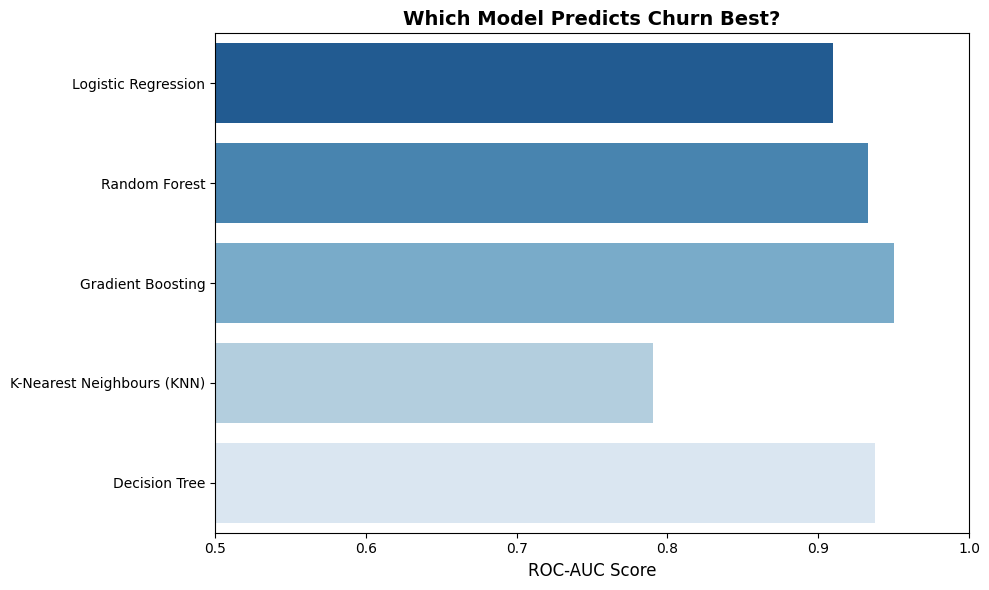

In [38]:
results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 6))

sns.barplot(
    x='ROC-AUC',
    y='Model',
    data=results_df,
    palette='Blues_r'
)

plt.xlim(0.5, 1.0)   # range of ROC-AUC
plt.title('Which Model Predicts Churn Best?', fontsize=14, fontweight='bold')
plt.xlabel('ROC-AUC Score', fontsize=12)
plt.ylabel('')

plt.tight_layout()
plt.savefig('churn_model_comparison.png', dpi=300)

print("Chart saved as 'churn_model_comparison.png'")


In [39]:
df_PowerBI.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7531 entries, 0 to 8540
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Opportunity Name                 7531 non-null   object
 1   Opportunity Category             7531 non-null   object
 2   Gender                           7531 non-null   object
 3   Country                          7531 non-null   object
 4   Institution Name                 7531 non-null   object
 5   Current/Intended Major           7531 non-null   object
 6   Age_at_Application_Int           7531 non-null   int32 
 7   Institution_Participation_Count  7531 non-null   int32 
 8   continent                        7531 non-null   object
 9   churn                            7531 non-null   int32 
 10  signup_month                     7531 non-null   int32 
 11  signup_weekday                   7531 non-null   int32 
 12  apply_delay_days                 7531 n

In [40]:
df_PowerBI.to_csv("PowerBi_Dataset.csv", index=False)

In [42]:
df_PowerBI['churn'].value_counts()
df_PowerBI['churn'].value_counts(normalize=True) * 100


,proportion
churn,
1,52.343646
0,47.656354


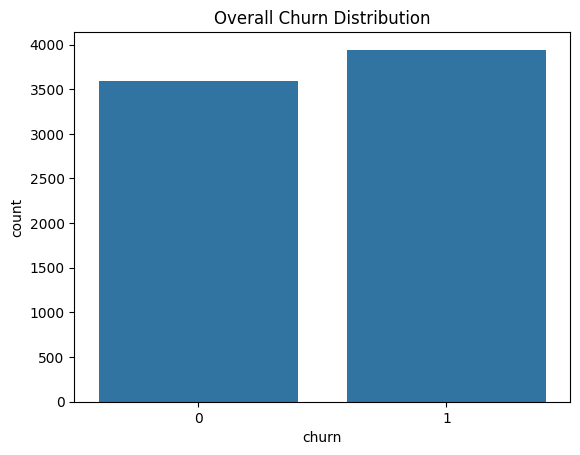

In [43]:
sns.countplot(x='churn', data=df)
plt.title("Overall Churn Distribution")
plt.show()

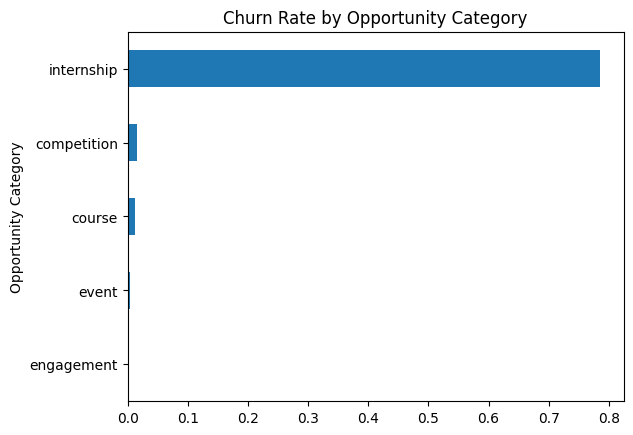

In [45]:
df_PowerBI.groupby('Opportunity Category')['churn'].mean().sort_values().plot(kind='barh')
plt.title("Churn Rate by Opportunity Category")
plt.show()


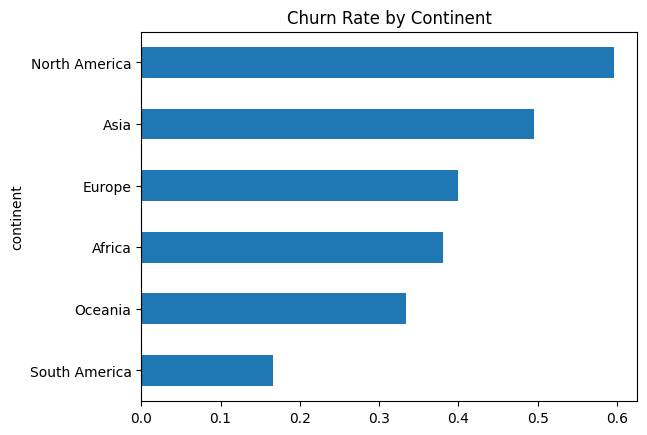

In [46]:
df_PowerBI.groupby('continent')['churn'].mean().sort_values().plot(kind='barh')
plt.title("Churn Rate by Continent")
plt.show()

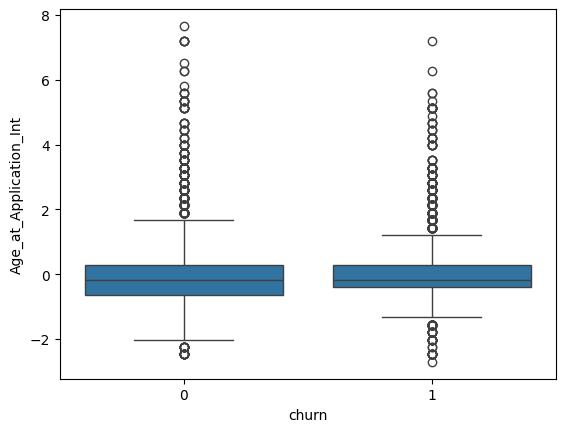

In [47]:
sns.boxplot(x='churn', y='Age_at_Application_Int', data=df)
plt.show()


In [48]:


importance = pd.Series(gb.feature_importances_, index=X.columns)
importance = importance.sort_values(ascending=False)

importance.head(20)


,0
Opportunity Category_internship,0.738148
apply_delay_days,0.085579
Opportunity Name_health care management,0.058771
apply_month,0.027356
Age_at_Application_Int,0.017743
Opportunity Name_project management,0.005789
Opportunity Name_digital marketing,0.004986
Opportunity Name_data visualization,0.004635
Opportunity Name_data visualization associate,0.003782
signup_month,0.003408


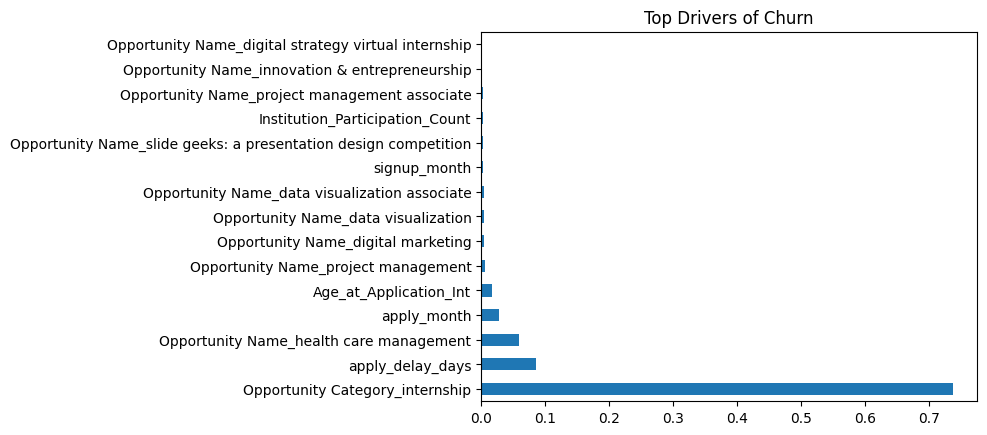

In [49]:
importance.head(15).plot(kind='barh')
plt.title("Top Drivers of Churn")
plt.show()


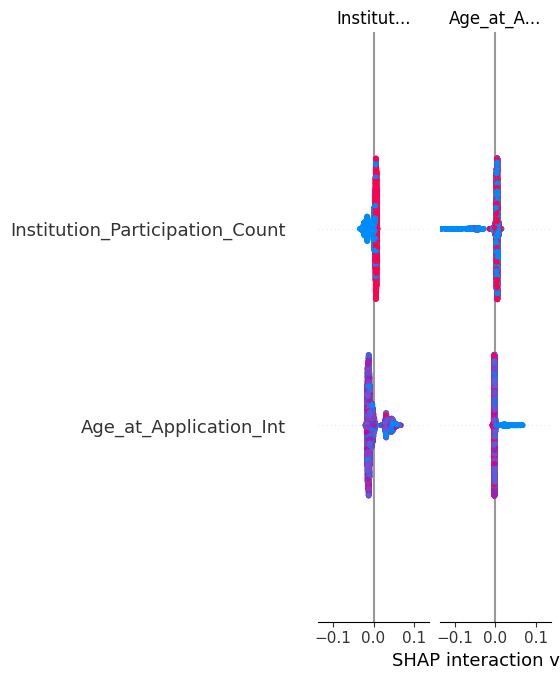

In [51]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)
